<a href="https://www.kaggle.com/code/benlittell/money-ball?scriptVersionId=114512293" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pitchingstats/2018_MLB_Pitching_Stats_II.txt
/kaggle/input/hittingstats/2018_MLB_Hitting_Stats.txt


In [2]:
import math
import matplotlib.pyplot as plt
import seaborn as sb

path1 = '/kaggle/input/hittingstats/2018_MLB_Hitting_Stats.txt'
path2 = '/kaggle/input/pitchingstats/2018_MLB_Pitching_Stats_II.txt'

hd_df = pd.read_csv(path1, delim_whitespace=True)
pd_df = pd.read_csv(path2, delim_whitespace=True)
hd_df.sort_values('WPCT', inplace=True)
pd_df.sort_values('WPCT', inplace=True)
x = [1.0,2.0,4.0,6.0,5.0,6.0,9.0,8.0,11.0,12.0]
y = [14.0,10.0,12.0,9.0,8.0,6.0,4.0,3.0,3.0,10.0]
print(pd_df)
hd_df

     #                 Team    G      IP     H   ER   HR   BB    SO  WHIP  \
0    1    Orioles_Baltimore  162  1431.0  1552  825  234  589  1203  1.50   
1    2   Royals_Kansas_City  162  1432.0  1542  787  205  549  1157  1.46   
8    9    White_Sox_Chicago  162  1437.0  1404  774  196  653  1259  1.43   
10  11        Marlins_Miami  161  1442.0  1388  763  192  605  1249  1.38   
7    8       Tigers_Detroit  162  1425.1  1423  728  216  491  1215  1.34   
5    6     Padres_San_Diego  162  1457.0  1430  714  185  519  1399  1.34   
2    3        Rangers_Texas  162  1431.0  1516  783  222  491  1121  1.40   
3    4      Reds_Cincinnati  162  1441.0  1491  745  228  532  1258  1.40   
4    5    Blue_Jays_Toronto  162  1433.2  1476  773  208  551  1298  1.41   
11  12  Giants_SanFrancisco  162  1461.1  1387  642  156  524  1269  1.31   
15  16        Mets_New_York  162  1460.2  1364  661  185  484  1446  1.27   
6    7      Twins_Minnesota  162  1443.1  1425  722  198  573  1377  1.38   

,#,Team,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,SO,BB,AVG,OBP,SLG,OPS,WPCT
11,12,Orioles_Baltimore,162,6034,5507,622,1317,242,15,188,593,81,22,1412,403,0.239,0.298,0.391,0.689,0.290
5,6,Royals_Kansas_City,162,6063,5505,638,1350,283,29,155,606,117,38,1310,414,0.245,0.305,0.392,0.697,0.358
6,7,White_Sox_Chicago,162,6071,5523,656,1332,259,40,182,639,98,41,1594,407,0.241,0.302,0.401,0.703,0.383
28,29,Marlins_Miami,161,6083,5488,589,1303,222,24,128,554,45,31,1384,429,0.237,0.303,0.357,0.660,0.391
20,21,Tigers_Detroit,162,6029,5494,630,1326,284,35,135,597,70,30,1341,410,0.241,0.300,0.380,0.680,0.395
7,8,Padres_San_Diego,162,6059,5486,617,1289,250,30,162,583,95,36,1523,443,0.235,0.297,0.380,0.677,0.407
17,18,Rangers_Texas,162,6163,5453,737,1308,266,24,194,696,74,35,1484,539,0.240,0.318,0.404,0.722,0.414
15,15,Reds_Cincinnati,162,6240,5532,696,1404,251,25,172,665,77,33,1376,524,0.254,0.328,0.401,0.729,0.414
14,15,Giants_San_Fran,162,6112,5541,603,1324,255,30,133,573,77,34,1467,408,0.239,0.300,0.368,0.668,0.451
26,27,Blue_Jays_Toronto,162,6076,5477,709,1336,320,16,217,680,47,30,1387,484,0.244,0.312,0.427,0.739,0.451


In [3]:
def corcoeff(xd, yd):
    sigma1 = sigma_xy(xd, yd) * len(xd)
    sigma2 = sum(xd)*sum(yd)
    sigma3 = len(xd) * sum([val**2 for val in xd])
    sigma4 = sum(xd)**2
    sigma5 = len(yd) * sum([val**2 for val in yd])
    sigma6 = sum(yd)**2
    top = (sigma1 - sigma2)
    bottom = (math.sqrt(sigma3-sigma4))*(math.sqrt(sigma5-sigma6))
    return top/bottom
    

def sigma_xy(xd, yd):
    nlist = []
    for i in range(len(xd)):
        nlist.append((xd[i]*yd[i]))
    return sum(nlist)

def least_sqrs(xd, yd):
    matrix1 = [[sum(val**2 for val in xd), sum(xd)], [sum(xd), len(xd)]]
    matrix2 = [sigma_xy(xd, yd), sum(yd)]
    array1 = np.array(matrix1)
    array2 = np.array(matrix2)
    invarray1 = np.linalg.inv(array1)
    solution = np.dot(invarray1, array2)
    return solution

def scatter_plot(data1, data2, slope, y_int):
    y_vals = []
    x_data = [min(data1), max(data1)]
    for val in range(2):
        ans = (slope * x_data[val]) + y_int
        y_vals.append(ans)
    plt.plot(x_data, y_vals, '-r')
    plt.scatter(data1, data2)
    plt.title('SCATTER PLOT')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.text(x_data[1], y_vals[1], f'Y={round(slope)}*X+{round(y_int)}', color='g')
    plt.show()
    
    
def mean(data):
    total = sum(data)
    m = total/len(data)
    return m
    
def median(data):
    data.sort()
    if len(data)%2 == 0:
        m = (data[len(data)//2] + data[len(data)//2-1])/2
    else:
        m = data[len(data)//2]
    return m

def variance(data):
    new_list = [(val-mean(data))**2 for val in data]
    v = mean(new_list)
    return v

def stand_dev(data):
    v = variance(data)
    s = math.sqrt(v)
    return s

def residuals(xd, yd, n=2):
    mb = least_sqrs(xd, yd)
    ys = [val*mb[0]+mb[1] for val in xd]
    r = [yd[n]-ys[n] for n in range(len(yd))]
    mr = mean(r)
    stdr = stand_dev(r)
    return r, mr, stdr

def scatter_plot_er(data1, data2, slope, y_int, std, title, xt, yt, n=2):
    y_vals = []
    e1 = []
    e2 = []
    x_data = [min(data1), max(data1)]
    for val in range(2):
        ans = (slope * x_data[val]) + y_int
        y_vals.append(ans)
    for val in range(2):
        ans = (slope * x_data[val]) + y_int +(n*std)
        e1.append(ans)
    for val in range(2):
        ans = (slope * x_data[val]) + y_int -(n*std)
        e2.append(ans)
    plt.plot(x_data, y_vals, '-r')
    plt.plot(x_data, e1, '--r')
    plt.plot(x_data, e2, '--r')
    plt.scatter(data1, data2)
    plt.title(title)
    plt.xlabel(xt)
    plt.ylabel(yt)
    plt.text(x_data[1], y_vals[1], f'Y={round(slope, 5)}*X+{round(y_int, 2)}', color='g')
    plt.show()
    
def remove_point(xd, yd, slope, y_int, std, n=2):
    for val in range(len(xd)):
        y1 = (slope * xd[val-1]) + y_int +(n*std)
        y2 = (slope * xd[val-1]) + y_int -(n*std)
        if yd[val-1] > y1 or yd[val-1] < y2:
            yd.pop(val-1)
            xd.pop(val-1)
    return xd, yd

In [4]:
def rmse(res):
    new_list = [val**2 for val in res]
    s = sum(new_list)
    i = s/len(new_list)
    return math.sqrt(i)

tres, tmres, tstdres = residuals(x, y)
rmset = rmse(tres)


In [5]:
# hd_df
# hitting coreelation coefficients
obp_list = hd_df['OBP'].values.tolist()
slg_list = hd_df[ 'SLG'].values.tolist()
avg_list = hd_df['AVG'].values.tolist()
rbi_list = hd_df['RBI'].values.tolist()
wpct_list = hd_df['WPCT'].values.tolist()

wpct_obp = corcoeff(wpct_list, obp_list)
wpct_slg = corcoeff(wpct_list, slg_list)
wpct_avg = corcoeff(wpct_list, avg_list)
wpct_rbi = corcoeff(wpct_list, rbi_list)

# Pitching correlation coefficients
era_list = pd_df['ERA'].values.tolist()
so_list = pd_df['SO'].values.tolist()
er_list = pd_df['ER'].values.tolist()
hr_list = pd_df['HR'].values.tolist()
pwpct_list = pd_df['WPCT'].values.tolist()

wpct_era = corcoeff(pwpct_list, era_list)
wpct_so = corcoeff(pwpct_list, so_list)
wpct_er = corcoeff(pwpct_list, er_list)
wpct_hr = corcoeff(pwpct_list, hr_list)
# new data frame for the correlations

coeeff_dict = {'H Name': ['OBP', 'SLG', 'AVG', "RBI"],
               'hitting': [wpct_obp, wpct_slg, wpct_avg, wpct_rbi],
               'P Name': ['ERA', 'SO', 'ER', 'HR'],
               'Pitching': [wpct_era, wpct_so, wpct_er, wpct_hr]
           }
ndf = pd.DataFrame(coeeff_dict)
ndf
print(ndf['Pitching'].values.tolist())


[-0.8757967641591999, 0.7361970808267885, -0.8748084994941568, -0.656633623952809]


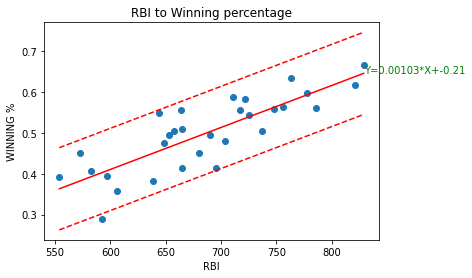

REFIT


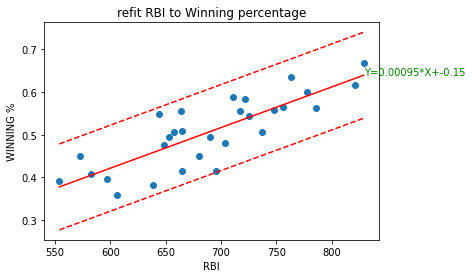

In [6]:
rbi_ls = least_sqrs(rbi_list, wpct_list)
rbir, rbimr, rbistdr = residuals(rbi_list, wpct_list)

scatter_plot_er(rbi_list, wpct_list, rbi_ls[0], rbi_ls[1], rbistdr, 'RBI to Winning percentage', 'RBI',  'WINNING %')
# print(len(wpct_list), len(rbi_list))
rbi_list_o, wpct_list_o = remove_point(rbi_list, wpct_list, rbi_ls[0], rbi_ls[1], rbistdr)
rbi_lso = least_sqrs(rbi_list_o, wpct_list_o)
rbir2, rbimr2, rbistdr2 = residuals(rbi_list_o, wpct_list_o)
print('REFIT')
scatter_plot_er(rbi_list_o, wpct_list_o, rbi_lso[0], rbi_lso[1], rbistdr, 'refit RBI to Winning percentage', 'RBI', 'WINNING %')

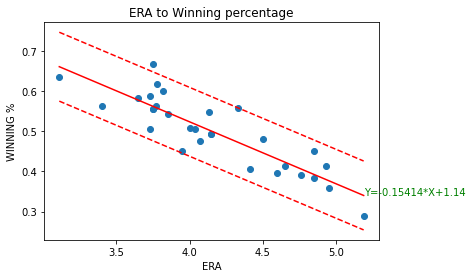

REFIT


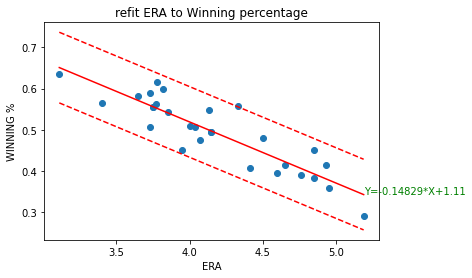

In [7]:
era_ls = least_sqrs(era_list, pwpct_list)
erar, eramr, erastdr = residuals(era_list, pwpct_list)

scatter_plot_er(era_list, pwpct_list, era_ls[0], era_ls[1], erastdr, 'ERA to Winning percentage', 'ERA', 'WINNING %')
# print(len(wpct_list), len(rbi_list))
era_list_o, pwpct_list_o = remove_point(era_list, pwpct_list, era_ls[0], era_ls[1], erastdr)
era_lso = least_sqrs(era_list_o, pwpct_list_o)
erar2, eramr2, erastdr2 = residuals(era_list_o, pwpct_list_o)
print('REFIT')
scatter_plot_er(era_list_o, pwpct_list_o, era_lso[0], era_lso[1], erastdr, 'refit ERA to Winning percentage', 'ERA', 'WINNING %')

In [8]:
rmse_rbi = rmse(rbir)
print(rmse_rbi)

rmse_era = rmse(erar)
print(rmse_era) 

0.050401157612708386
0.042885596284616224


In [9]:
def least_sqrs3(x1, x2, y1):
    x1_2 = (x1**2).sum()
    x2_2 = (x2**2).sum()
    x1x2 = (x1*x2).sum()
    x1y1 = (x1*y1).sum()
    x2y1 = (x2*y1).sum()
    matrix1 = np.array([[x1_2, x1x2, x1.sum()],
                        [x1x2, x2_2, x2.sum()],
                        [x1.sum(), x2.sum(), len(x1)]
                       ])
    matrix2 = np.array([[x1y1], [x2y1], [y1.sum()]])
    invarray1 = np.linalg.inv(matrix1)
    solution = np.dot(invarray1, matrix2)
    return solution[0][0], solution[1][0], solution[2][0]


# def multi_lin_reg(x1, x2, y2):
#     test = [((y2[val]-(coeff_x1*x1[val]+coeff_x2*x2[val]+coeff_con))**2).sum() for val in range(len(x1))]
#     return test

coeff_x1, coeff_x2, coeff_con = least_sqrs3(np.array(rbi_list), np.array(era_list), np.array(wpct_list))
print(coeff_x1, coeff_x2, coeff_con)
test = [((np.array(wpct_list)[val]-(coeff_x1*np.array(rbi_list)[val]+coeff_x2*np.array(era_list)[val]+coeff_con))**2).sum() for val in range(len(np.array(rbi_list)))]
print(test)
r1223 = rmse(test)
print(r1223)

0.000462652416624465 -0.09927999549007183 0.6016180910713729
[7.607815012218568e-05, 0.0005206158366649885, 0.00021258947104034115, 0.0001050380093278453, 5.862154371939253e-05, 0.005155152825229079, 3.40072128704886e-05, 0.0021099372462873886, 0.0002652417355117508, 0.0012057233464084281, 0.0017855535404837227, 0.0013712105744390567, 0.00022011512288976678, 0.0006042226525700151, 1.0978860336944956e-06, 0.0008980549489530096, 9.479556465537525e-06, 0.0010024654796267208, 0.0010684077779658276, 0.00037949718070969717, 0.00030213794338196875, 0.0007085972443361423, 0.00017155066322775223, 0.00022804476780664972, 0.00043297387308016564, 6.010454293259443e-05, 0.00021885822422810304, 0.00320995876524235, 8.828779416118576e-05]
0.0013479696831135955
